<a href="https://colab.research.google.com/github/vateseif/traffic_sign_recognition/blob/master/traffic_sign_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import shutil


# Downloading Kaggle dataset (GTSRB)

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"vateseif99","key":"c00e2a500deb03e9e1ba578e43682111"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

# API call to download German traffic sign dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# Unzipping dataset
!unzip -q "gtsrb-german-traffic-sign.zip"



100% 611M/612M [00:05<00:00, 186MB/s]
100% 612M/612M [00:05<00:00, 122MB/s]


# Data Augmentation (with dataset fix)
Now we will augment the data and create new images to add to the ones we have already

FOR MORE INFO CHECK:


https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

From there, we’ll parse three command line arguments:

--image : The path to the input image. We’ll generate additional random, mutated versions of this image.

--output : The path to the output directory to store the data augmentation examples.

--total : The number of sample images to generate.

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import argparse
import easydict

# construct the argument parser and parse the arguments
def augmentData(imagePath, outputPath, total):
  """
    imagePath = path to image
    outputPath = path to where the new augmented data will be stored
    total = number of sample images to generate
  """
  parser = argparse.ArgumentParser()
  args = parser.parse_args(args=[])
  args = easydict.EasyDict({
    "image": imagePath,
    "output": outputPath,
    "total" : total
    })
  image = load_img(args["image"])
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  # construct the image generator for data augmentation then
  # initialize the total number of images generated thus far
  aug = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.7,1.3],
    fill_mode="nearest")
  total = 0
  imageGen = aug.flow(image, batch_size=1, save_to_dir=args["output"],
	save_prefix="image", save_format="jpg")
  # loop over examples from our image data augmentation generator
  for image in imageGen:
    # increment our counter
    total += 1
    # if we have reached the specified number of examples, break
    # from the loop
    if total == args["total"]:
      break
  

In [ ]:
augmentData("/content/train/0/00000_00004_00024.png","/content/",total=5)

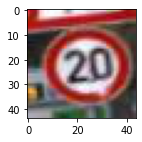

In [ ]:
import cv2
import PIL.Image

image = '/content/train/0/00000_00004_00024.png'
rgba_image = PIL.Image.open(image)
plt.figure(figsize=(2,2))
plt.imshow(rgb_image)
plt.show()

**Augmenting the training dataset**

At location "/content/Data/Test"

In [ ]:
import os
imagePerClass = 2500
i=0

# Directories for augmented datasets
augmented_train_data_dir = "/content/Train/"

for i in range(len(os.listdir(augmented_train_data_dir))):
  print(i)
  classPath = augmented_train_data_dir + os.listdir(augmented_train_data_dir)[i]
  n = len(os.listdir(classPath))
  if n <= imagePerClass/2:
    for j in range(n):
      imPath = classPath+"/"+os.listdir(classPath)[j]
      imageCopiesNumber = int(round((imagePerClass-n)/n))
      augmentData(imagePath=imPath,outputPath=classPath,total=imageCopiesNumber)
  elif n > imagePerClass/2 and n < imagePerClass:
    from random import randrange
    diff = imagePerClass - n
    for _ in range(diff):
      index = randrange(n)
      imPath = classPath+"/"+os.listdir(classPath)[index]
      augmentData(imagePath=imPath,outputPath=classPath,total=1)

shutil.move("/content/Train","/content/Data/Train")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


'/content/Data/Train'

**Creating Test dataset**

At location "/content/Data/Test"

In [ ]:
#shutil.copytree(testing_data_dir,"/content/Data/Testing")
import csv
from collections import defaultdict

columns = defaultdict(list) # each value in each column is appended to a list

with open('/content/Test.csv') as f:
    reader = csv.DictReader(f) # read rows into a dictionary format
    for row in reader: # read a row as {column1: value1, column2: value2,...}
        for (k,v) in row.items(): # go over each column name and value 
            if k == "Path" or k == "ClassId":
              columns[k].append(v) # append the value into the appropriate list
                                 # based on column name k

os.mkdir("/content/Data/Test")
for i in range(43):
  os.mkdir("/content/Data/Test/"+str(i))

for i in range(len(columns["Path"])):
  s = "/content/"+columns["Path"][i]
  d = "/content/Data/"+(columns["Path"][i])[:5]+columns["ClassId"][i]+"/"+(columns["Path"][i])[5:]
  os.rename(s,d)

**Visualizing the augmented dataset**

All categories almost have around 2500 images each now

{0: 2256, 1: 2497, 2: 2499, 3: 2449, 4: 2487, 5: 2474, 6: 2315, 7: 2450, 8: 2445, 9: 2455, 10: 2496, 11: 2431, 12: 2491, 13: 2491, 14: 2232, 15: 2360, 16: 2303, 17: 2158, 18: 2323, 19: 2274, 20: 2305, 21: 2400, 22: 2154, 23: 2378, 24: 2229, 25: 2459, 26: 2248, 27: 2192, 28: 2509, 29: 2217, 30: 2456, 31: 2226, 32: 2170, 33: 2570, 34: 2329, 35: 2321, 36: 2151, 37: 2279, 38: 2492, 39: 2174, 40: 2300, 41: 2165, 42: 2170}


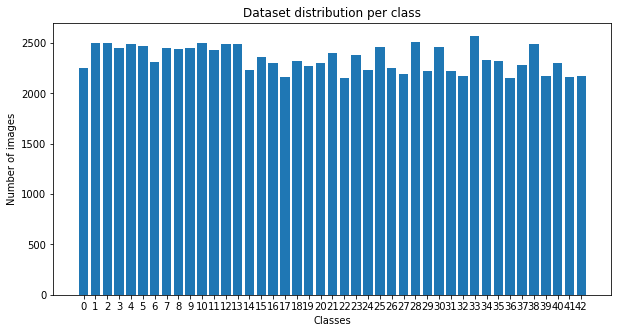

100780


In [ ]:
target_names = [item for item in os.listdir("/content/Data/Train/") if os.path.isdir(os.path.join("/content/Data/Train/", item))]

classes = {} # Classes is a dictionary of type {category : # of images}
for cat in target_names:
  classes[cat] = len(os.listdir("/content/Data/Train/"+cat))

classes = {int(k):int(v) for k,v in classes.items()}
classes = dict(sorted(classes.items())) # Sort classes by category number: 0,1,2,3...
print(classes)
# Plot the # of images per category (training and testing) WE NEED TO FIX IT
plt.figure(figsize=(10,5))
plt.bar(range(len(classes)), list(classes.values()), align='center')
plt.xticks(range(len(classes)), list(classes.keys()))

plt.title("Dataset distribution per class")
plt.xlabel("Classes")
plt.ylabel("Number of images")

plt.show()

print(sum(classes.values()))


# Train model with fastai (ResNet34) - 93% test accuracy

For reference:
https://github.com/surmenok/GTSRB/blob/master/german-traffic-signs.ipynb


Import libraries

In [ ]:
import fastai
from fastai import *
from fastai.vision import *
bs =64

**Generate ImageDataBunch**

Both "Train" and "Test" folder must be in the same folder "Data"

In [ ]:
## Declaring path of dataset
path = '/content/Data/'
wd=5e-4
## Loading data 
data = fastai.vision.ImageDataBunch.from_folder(path, train='Train', valid="Test",
                                  ds_tfms=get_transforms(), size=80, bs=bs)
## Normalizing data based on Image net parameters
data.normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


ImageDataBunch;

Train: LabelList (100780 items)
x: ImageList
Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80)
y: CategoryList
27,27,27,27,27
Path: /content/Data;

Valid: LabelList (12630 items)
x: ImageList
Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80),Image (3, 80, 80)
y: CategoryList
27,27,27,27,27
Path: /content/Data;

Test: None

**Declare unfrozen model (*all weights trainable*)**

In [ ]:
## To create a ResNET 34 with pretrained weights
# pretrained = False - All layers are trainable
learn = cnn_learner(data, models.resnet34, metrics=accuracy, pretrained=False)

Fit model for 1 epoch (***all weights trainable***)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
learn.fit(lr=0.01,epochs= 1, wd=wd,)
learn.validate()

epoch,train_loss,valid_loss,accuracy,time
0,1.752816,1.528188,0.506176,04:03


[1.5281881, tensor(0.5062)]

Unfreeze model and find best ***learning_rate***

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


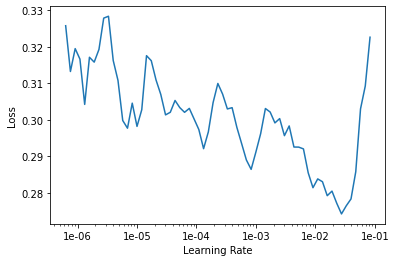

In [ ]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

Train for 3 more epochs

In [ ]:
learn.unfreeze()
learn.fit(lr=0.01, epochs=3, wd=wd)
#learn.fit(0.01, 3)
learn.validate(dl=data.valid_dl)

epoch,train_loss,valid_loss,accuracy,time
0,0.682817,0.836001,0.732067,03:57
1,0.377023,0.420082,0.901742,03:54
2,0.273053,0.392724,0.901821,03:53


[0.39272356, tensor(0.9018)]

In [ ]:
learn.save('model_v1')

Train for one cycle

**Research fit_one_cycle:**

https://forums.fast.ai/t/how-to-best-use-fit-one-cycle-in-practice/40940

In [ ]:
learn.fit_one_cycle(tot_epochs= 2, wd=wd,cyc_len=1)
#learn.fit(lr, 4, cycle_len=1, cycle_mult=2)
learn.validate(dl=data.valid_dl)

epoch,train_loss,valid_loss,accuracy,time
0,0.109214,0.202963,0.948139,04:02


[0.20296317, tensor(0.9481)]

In [ ]:
learn.model.eval()
learn.save('model_v2') # USELESS, instead use learn.export

**Export model**

In [ ]:
learn.export('/content/Data/models/sign_classifier.pkl')

In [ ]:
learn.validate(dl=data.valid_dl)

[0.20296317, tensor(0.9481)]

# Confusion matrix

In [ ]:
log_preds, y = learn.get_preds(learn.dl)
preds = np.exp(log_preds)
pred_labels = np.argmax(preds, axis=1)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(45, 45))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Confusion matrix
#cm = confusion_matrix(y, pred_labels)
#plot_confusion_matrix(learn,X=pred_labels, y_true=y)
class_names = ['Speed limit (20km/h)','Speed limit (30km/h)','No passing for vechiles over 3.5 metric tons',
'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', ' Vechiles over 3.5 metric tons prohibited',
'No entry', 'General caution', 'Dangerous curve to the left', 'Speed limit (50km/h)', 'Dangerous curve to the right',
'Double curve','Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians',
'Children crossing', 'Bicycles crossing', 'Speed limit (60km/h)', 'Beware of ice/snow', 'Wild animals crossing',
'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right',
'Go straight or left', 'Keep right', 'Keep left', 'Speed limit (70km/h)', 'Roundabout mandatory', 'End of no passing',
'End of no passing by vechiles over 3.5 metric tons', 'Speed limit (80km/h)', 'End of speed limit (80km/h)',
'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing'
]
cm = confusion_matrix(y, pred_labels)
'''
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] )
ax.set_yticklabels([''] )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
'''


plot_confusion_matrix(cm, target_names=class_names)

# Load and test model

**Load model**

In [ ]:
learn2 = load_learner(path="/content/Data/models",file='gtrsb_1.pkl',test=data.test_ds)

**Calculate accuracy**

In [ ]:
acc = learn2.validate(dl=data.valid_dl)
print('Model accuracy = ', float(acc[2])*100,'%')

[0.21616928, tensor(0.9440)]

**Test model**

(Category tensor(40), tensor(40), tensor([5.7583e-09, 1.4319e-06, 1.0267e-11, 8.0422e-08, 1.9949e-08, 1.0326e-09,
        1.1216e-09, 1.6460e-07, 3.6739e-09, 3.7973e-09, 1.3328e-11, 2.5710e-14,
        1.3582e-05, 5.3995e-13, 1.4386e-12, 2.2282e-11, 4.7718e-12, 3.3005e-11,
        4.4300e-12, 8.5682e-12, 2.8949e-11, 1.4970e-12, 5.7024e-11, 2.3749e-08,
        5.0371e-08, 3.8099e-12, 1.7561e-10, 3.4388e-07, 1.8168e-08, 9.4979e-07,
        7.5644e-09, 4.0324e-09, 2.9116e-06, 1.3908e-08, 1.5638e-08, 2.7729e-09,
        1.2506e-12, 5.9877e-10, 4.6423e-06, 2.5788e-13, 9.9998e-01, 2.9377e-07,
        5.6213e-11]))
CLASS =  Speed limit (100km/h) ACC = tensor(1.0000)


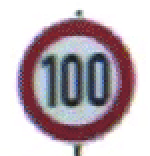

In [ ]:
learn2.model.eval()

#img2 = open_image('/content/test_image_100.png')
classes = [0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,5,6,7,8,9]
class_names = ['Speed limit (20km/h)','Speed limit (30km/h)','No passing for vechiles over 3.5 metric tons',
'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', ' Vechiles over 3.5 metric tons prohibited',
'No entry', 'General caution', 'Dangerous curve to the left', 'Speed limit (50km/h)', 'Dangerous curve to the right',
'Double curve','Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians',
'Children crossing', 'Bicycles crossing', 'Speed limit (60km/h)', 'Beware of ice/snow', 'Wild animals crossing',
'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right',
'Go straight or left', 'Keep right', 'Keep left', 'Speed limit (70km/h)', 'Roundabout mandatory', 'End of no passing',
'End of no passing by vechiles over 3.5 metric tons', 'Speed limit (80km/h)', 'End of speed limit (80km/h)',
'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing'
]


img2 = open_image('/content/test_image_100_4.png')

#img = img.apply_tfms(tfms=get_transforms()[1], size=80)

pred = learn2.predict(img2)
#print(pred)
k = int(pred[0])
print("CLASS = ",class_names[k], 'ACC =',max(pred[2]))
img2
